In [2]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score
from torchvision.models import googlenet  
import time

# Define the path to your training and validation data
train_folder_path = "/Users/anishajasti/Desktop/Train Images/"
val_folder_path = "/Users/anishajasti/Desktop/Val Images/"

# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Data augmentation: random horizontal flip
    transforms.RandomRotation(10),  # Data augmentation: random rotation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Create datasets
train_dataset = ImageFolder(train_folder_path, transform=transform)
val_dataset = ImageFolder(val_folder_path, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Track time for training
start_time = time.time()

# Define the GoogLeNet model
model = googlenet(pretrained=True)  # Use pre-trained GoogLeNet model

# Modify the final fully connected layer for your specific task
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.00001)  # Reduce learning rate

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
num_epochs = 10  # Increase number of epochs for better convergence
best_val_accuracy = 0.0  # Initialize best validation accuracy
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Train Loss: {running_loss / len(train_loader)}")

    # Evaluate the model on validation data
    model.eval()
    val_predictions = []
    val_targets = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            val_predictions.extend(predicted.cpu().numpy())
            val_targets.extend(labels.cpu().numpy())

    # Calculate validation accuracy
    validation_accuracy = accuracy_score(val_targets, val_predictions)
    print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")


/Users/anishajasti/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/anishajasti/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Train Loss: 1.5856624682744345
Validation Accuracy: 30.00%
Epoch 2, Train Loss: 1.530753215154012
Validation Accuracy: 44.17%
Epoch 3, Train Loss: 1.4782293478647868
Validation Accuracy: 60.00%
Epoch 4, Train Loss: 1.4307787100474039
Validation Accuracy: 70.83%
Epoch 5, Train Loss: 1.3659199714660644
Validation Accuracy: 73.33%
Epoch 6, Train Loss: 1.3100490967432659
Validation Accuracy: 77.50%
Epoch 7, Train Loss: 1.2463265180587768
Validation Accuracy: 87.50%
Epoch 8, Train Loss: 1.1842116912206013
Validation Accuracy: 86.67%
Epoch 9, Train Loss: 1.117059862613678
Validation Accuracy: 87.50%
Epoch 10, Train Loss: 1.0416844248771668
Validation Accuracy: 89.17%


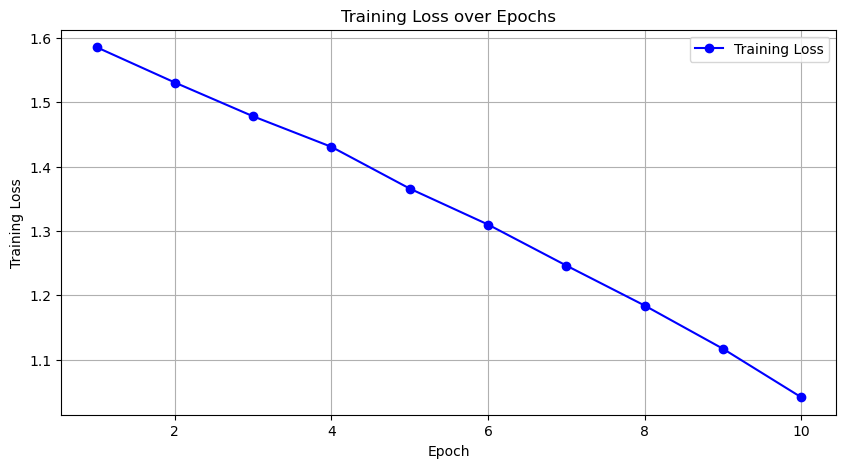

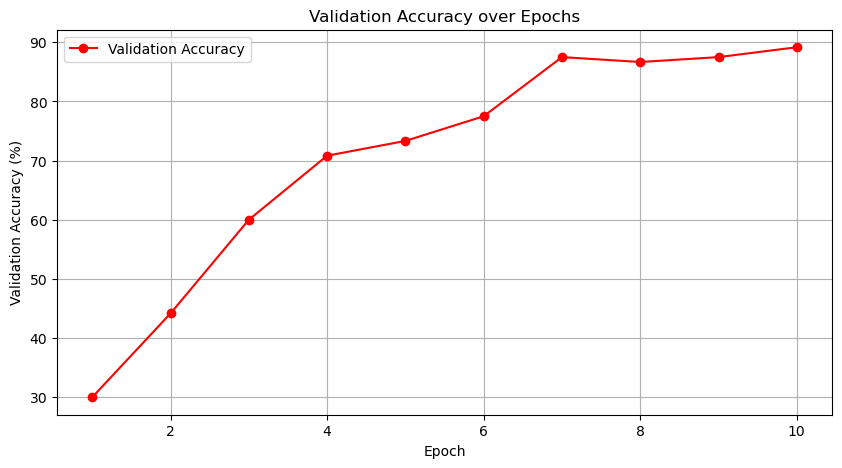

In [7]:
import matplotlib.pyplot as plt

# Training loss and validation accuracy data
train_losses = [1.5856624682744345, 1.530753215154012, 1.4782293478647868, 1.4307787100474039, 1.3659199714660644, 1.3100490967432659, 1.2463265180587768, 1.1842116912206013, 1.117059862613678, 1.0416844248771668]
val_accuracies = [30.00, 44.17, 60.00, 70.83, 73.33, 77.50, 87.50, 86.67, 87.50, 89.17]

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o', color='b')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.legend()
plt.show()

# Plot validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', marker='o', color='r')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy over Epochs')
plt.grid(True)
plt.legend()
plt.show()